<a href="https://colab.research.google.com/github/thisishasan/slda/blob/hasan/slda_assignment_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment no. 04 - Heart Disease Prediction using Classification Analysis Framework
## Submitted by: Muhammad Hasan (ID: D03000134)

# Introduction
Classification analysis is a crucial component of data science and machine learning, enabling the development of predictive models that categorize data into predefined classes. This report presents a **Classification Analysis Framework**, where a dataset related to heart disease prediction has been analyzed to build and compare multiple classification models. The dataset, sourced from the UCI Machine Learning Repository [https://archive.ics.uci.edu/dataset/45/heart+disease], contains various medical attributes that help determine the presence or absence of heart disease.

The report follows a structured methodology, beginning with **data preprocessing**, including handling missing values and feature selection. This is followed by **Exploratory Data Analysis (EDA)** to understand data distribution and relationships. The study then applies **feature engineering** and **oversampling techniques (SMOTE)** to address class imbalances before training different classification models. Finally, model performance is evaluated using metrics such as **accuracy, precision, recall, F1-score, and AUC-ROC curves** to determine the most effective classifier.

Through this framework, we aim to identify the best-performing model that can effectively classify heart disease risk, providing valuable insights for medical diagnosis and decision-making.

## Import all necessary libraries

In [1017]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import zipfile

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import mannwhitneyu, ttest_ind, skew, kurtosis, shapiro, kstest, anderson, chi2_contingency

from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc

## Download and load the dataset into dataframe for data analysis

In [1018]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
dataset_path = 'processed_cleveland.csv'
urllib.request.urlretrieve(url, dataset_path)
df = pd.read_csv(dataset_path, names=column_names)

In [1019]:
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

## Intitial Analysis of the dataset

In [1020]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [1021]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [1022]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [1023]:
df.shape

(303, 14)

## Preparation for Exploratory Data Analysis (EDA)

### Checking Missing values

In [1024]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Only two columns have missing values:

**ca** (Number of major vessels colored by fluoroscopy) = 4 missing values
**thal** (Thalassemia type) = 2 missing values

All other columns are fully populated (no missing values).

### Examing unique values in the dataset



In [1025]:
df.nunique()

,0
age,41
sex,2
cp,4
trestbps,50
chol,152
fbs,2
restecg,3
thalach,91
exang,2
oldpeak,40


### Identify numeric variables and categorical variables by number of unique counts

Variables having high unique counts are considered as Numeric variables whereas variables having low unique counts are considered as Categorical variables

In [1026]:
numeric_var = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categoric_var = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
target_var = ["target"]

# Exploratory Data Analysis

## Univariate Analysis of Numeric Variables

In [1027]:
df[numeric_var].describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [1028]:
numerical_analysis = {}

for column in numeric_var:
    data = df[column].dropna()
    skewness = data.skew()
    kurtois = data.kurt()
    numerical_analysis[column] = {
        "Skewness": skewness,
        "Skewness Type": "Symmetric (Normal)" if skewness == 0 else "Right-Skewed (Positive)" if skewness > 0 else "Left-Skewed (Negative)",
        "Kurtosis": kurtois,
        "Type of Kurtosis": "Leptokurtic (High)" if kurtois > 3 else "Platykurtic (Low)" if kurtois < 3 else "Mesokurtic (Normal)",
    }

numerical_analysis_df = pd.DataFrame(numerical_analysis)
display(numerical_analysis_df.T)

,Skewness,Skewness Type,Kurtosis,Type of Kurtosis
age,-0.20906,Left-Skewed (Negative),-0.523383,Platykurtic (Low)
trestbps,0.706035,Right-Skewed (Positive),0.880074,Platykurtic (Low)
chol,1.135503,Right-Skewed (Positive),4.491724,Leptokurtic (High)
thalach,-0.537449,Left-Skewed (Negative),-0.053541,Platykurtic (Low)
oldpeak,1.26972,Right-Skewed (Positive),1.575813,Platykurtic (Low)


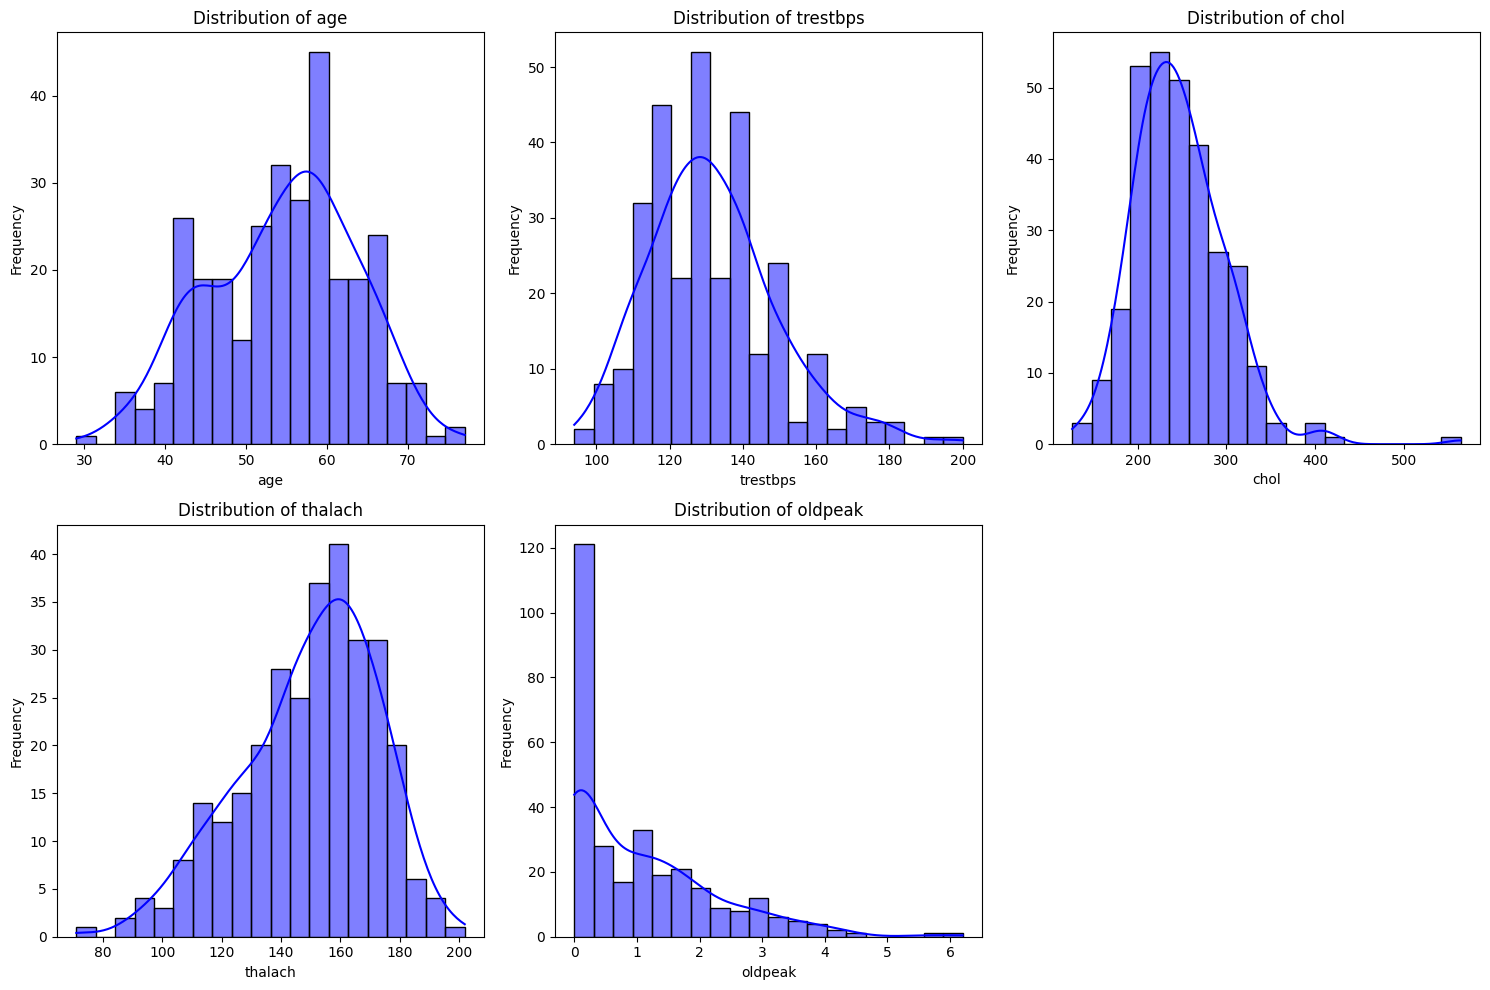

In [1029]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_var, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[column], bins=20, kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


**Skewness**

* **age** - The age distribution has a minor left tail, meaning slightly more values are on the higher end.
* **trestbps** -Blood pressure has a longer right tail, meaning there are more high blood pressure cases than low ones.
* **chol** - Cholesterol is highly skewed to the right, meaning most people have lower cholesterol, but a few have extremely high values.
* **thalach** - Maximum heart rate achieved is slightly skewed to the left, indicating more high values than low ones.
* **oldpeak** - Oldpeak (ST depression) is strongly right-skewed, meaning that most patients have low ST depression, but some have very high values.

**Kutosis**

* **age** - The distribution of age is relatively flat, meaning values are more spread out with fewer extreme cases.
* **trestbps** - Blood pressure values are evenly distributed without extreme outliers.
* **chol** - Cholesterol has a sharp peak, meaning most values are close together, but there are a few extreme outliers.
* **thalach** - Heart rate values are also spread out, with no significant clustering.
* **oldpeak** - Oldpeak values are moderately spread out, with some variance but no extreme outliers.

## Univariate Analysis of Categorical Variables

In [1030]:
categorical_counts = {col: df[col].value_counts() for col in categoric_var}
for col, counts in categorical_counts.items():
    print(f"Category Counts for {col}:\n{counts}\n{'-'*40}")


Category Counts for sex:
sex
1.0    206
0.0     97
Name: count, dtype: int64
----------------------------------------
Category Counts for cp:
cp
4.0    144
3.0     86
2.0     50
1.0     23
Name: count, dtype: int64
----------------------------------------
Category Counts for fbs:
fbs
0.0    258
1.0     45
Name: count, dtype: int64
----------------------------------------
Category Counts for restecg:
restecg
0.0    151
2.0    148
1.0      4
Name: count, dtype: int64
----------------------------------------
Category Counts for exang:
exang
0.0    204
1.0     99
Name: count, dtype: int64
----------------------------------------
Category Counts for slope:
slope
1.0    142
2.0    140
3.0     21
Name: count, dtype: int64
----------------------------------------
Category Counts for ca:
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
----------------------------------------
Category Counts for thal:
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64
------

#### Visualization of Categorical Variable Counts Distribution

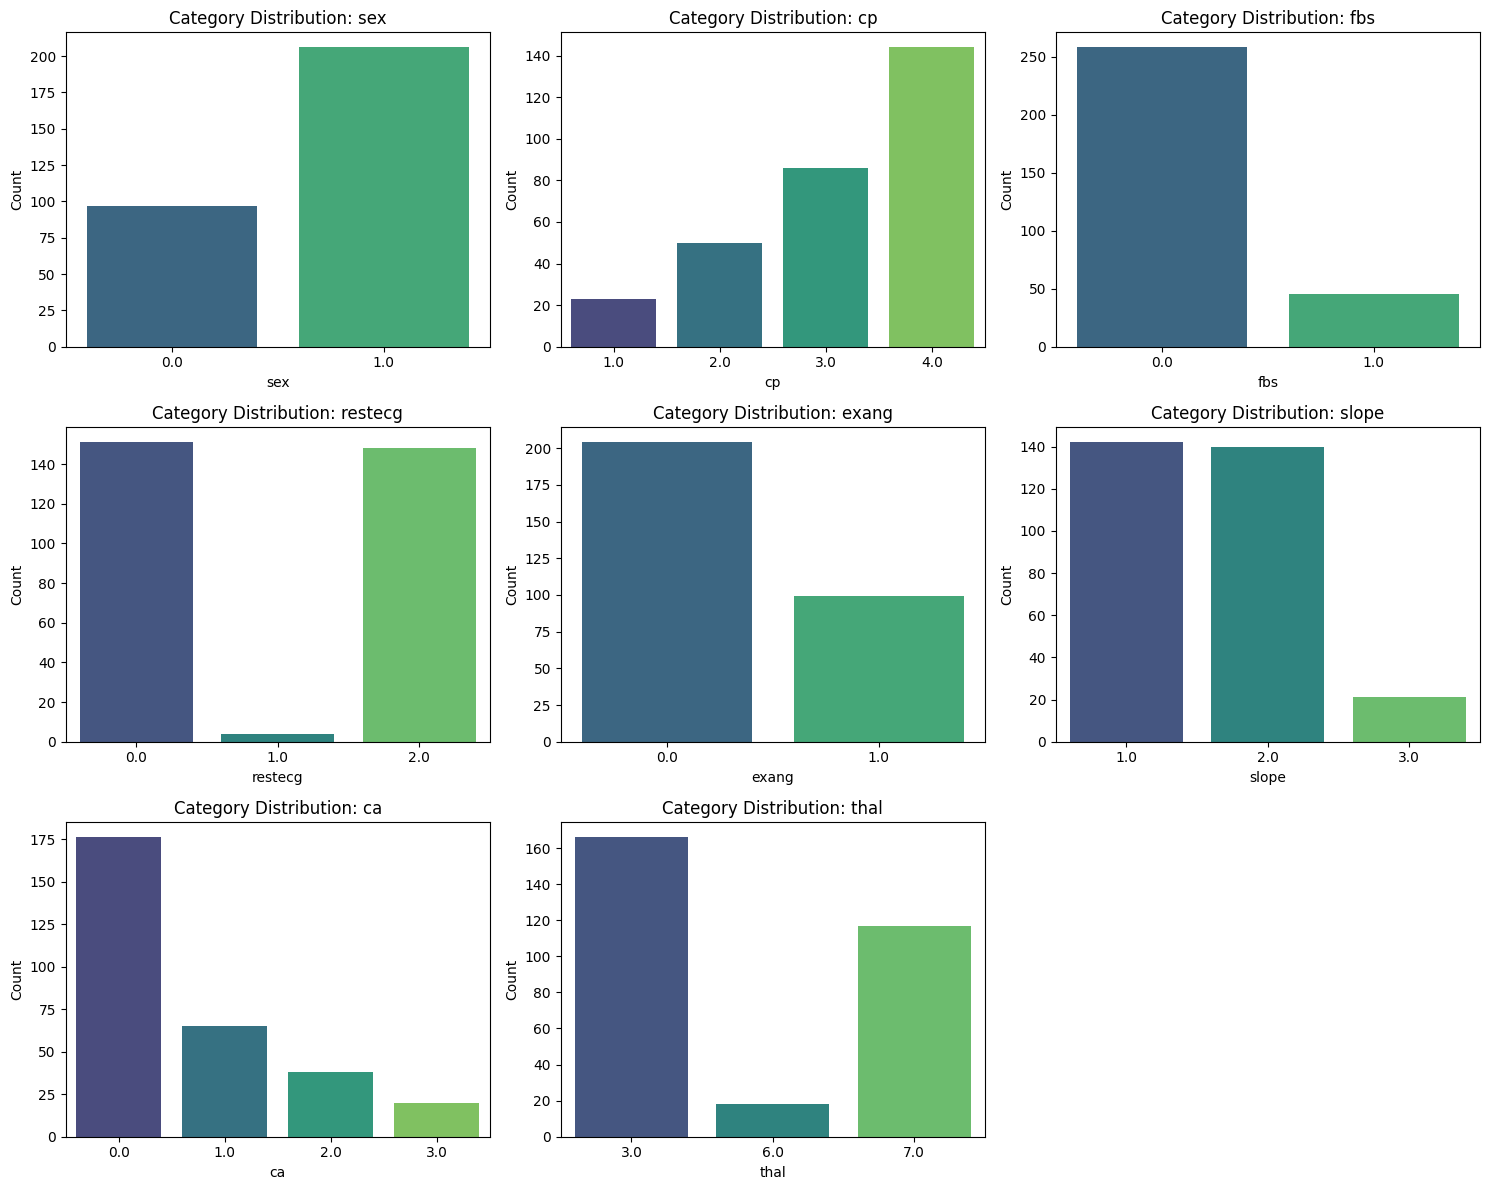

In [1031]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(categoric_var, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[column], palette="viridis")
    plt.title(f'Category Distribution: {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### Summary of Categorical Variable Distribution

The following is a summary of the distribution of categorical variables in the dataset, based on their frequency counts:

1. **Sex (Gender)**
   - **1.0 (Male):** 206 (67.99%)
   - **0.0 (Female):** 97 (32.01%)
   - **Observation:** The dataset is **male-dominated**, with more than **two-thirds** of patients being male.

2. **Chest Pain Type (cp)**
   - **4.0:** 144 cases (Most common)
   - **3.0:** 86 cases
   - **2.0:** 50 cases
   - **1.0:** 23 cases (Least common)
   - **Observation:** The most frequently observed chest pain type is **category 4**, while **category 1** is the least common.

3. **Fasting Blood Sugar (fbs)**
   - **0.0 (≤ 120 mg/dl):** 258 (85.15%)
   - **1.0 (> 120 mg/dl):** 45 (14.85%)
   - **Observation:** Most patients (**85%**) have **normal fasting blood sugar levels**, indicating high fasting blood sugar is not common.

4. **Resting ECG Results (restecg)**
   - **0.0:** 151 cases
   - **2.0:** 148 cases
   - **1.0:** 4 cases (Least common)
   - **Observation:** The majority of patients have resting ECG values **0 or 2**, while **category 1 is rare**.

5. **Exercise-Induced Angina (exang)**
   - **0.0 (No):** 204 (67.32%)
   - **1.0 (Yes):** 99 (32.68%)
   - **Observation:** Around **two-thirds of patients do not experience exercise-induced angina**, but a significant **one-third do**.

6. **Slope of the ST Segment (slope)**
   - **1.0:** 142 cases
   - **2.0:** 140 cases
   - **3.0:** 21 cases (Least common)
   - **Observation:** Categories **1 and 2 are almost equally distributed**, while **category 3 is rare**.

7. **Number of Major Vessels (ca)**
   - **0.0:** 176 cases (Most common)
   - **1.0:** 65 cases
   - **2.0:** 38 cases
   - **3.0:** 20 cases (Least common)
   - **Observation:** The majority of patients have **0 major vessels with significant narrowing**, while **higher counts (2 or 3) are less frequent**.

8. **Thalassemia Type (thal)**
   - **3.0:** 166 cases (Most common)
   - **7.0:** 117 cases
   - **6.0:** 18 cases (Least common)
   - **Observation:** **Thalassemia type 3 is the most frequent**, while **type 6 is rare**.

## Univariate analysis of Target variable

In [1032]:
target_counts = df['target'].value_counts().reset_index()
target_counts.columns = ['Target Class', 'Count']
target_counts['Percentage'] = (target_counts['Count'] / target_counts['Count'].sum()) * 100
print(target_counts)

   Target Class  Count  Percentage
0             0    164   54.125413
1             1     55   18.151815
2             2     36   11.881188
3             3     35   11.551155
4             4     13    4.290429


* The dataset is imbalanced, with class 0 (54.13%) being the most common.
* Class 4 is underrepresented (less than 5%).

## Bivariate Analysis of Categorical variables vs Target Variable

### Performed Chi-Square Test to check association between categorical variables and target variable

In [1033]:
categorical_associations = []
significance_level = 0.05
for i, cat_var in enumerate(categoric_var):
    for tar_var in target_var:
        contingency_table = pd.crosstab(df[cat_var], df[tar_var])
        chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_stat = chi2_stat.round(2)
        categorical_associations.append({
            "Categorical Variable": cat_var,
            "Target Variable": tar_var,
            "Chi-Square Statistic": chi2_stat,
            "p-value": p_value,
            "Association": "Significant" if p_value < significance_level else "Not Significant"
        })

categorical_associations_df = pd.DataFrame(categorical_associations)
display(categorical_associations_df)

,Categorical Variable,Target Variable,Chi-Square Statistic,p-value,Association
0,sex,target,23.43,1.041059e-04,Significant
1,cp,target,88.98,7.781947e-14,Significant
2,fbs,target,7.82,9.841684e-02,Not Significant
3,restecg,target,20.74,7.880178e-03,Significant
4,exang,target,61.69,1.279482e-12,Significant
5,slope,target,56.17,2.614777e-09,Significant
6,ca,target,109.92,6.201869e-18,Significant
7,thal,target,97.99,1.096475e-17,Significant


**Significant Associations (p-value < 0.05)**

The following categorical variables show a significant association with the target variable, meaning they contribute to predicting the target:

* sex (p-value = 1.04e-04) → Gender has an impact on the target.
* cp (p-value = 7.78e-14) → Chest pain type has a very strong association.
* restecg (p-value = 7.88e-03) → Resting ECG results are associated with the target.
* exang (p-value = 1.27e-12) → Exercise-induced angina strongly correlates with the target.
* slope (p-value = 2.61e-09) → The slope of the ST segment is significantly associated.
* ca (p-value = 6.20e-18) → Number of major vessels colored by fluoroscopy has a strong impact.
* thal (p-value = 6.21e-18) → Thalassemia type has a very strong association.

**Not Significant Associations (p-value > 0.05)**

* fbs (p-value = 9.84e-02) → Fasting blood sugar does not show a significant association with the target variable.

## Bivariate Analysis of Numeric Variables vs Target Variable

### Measuring Pearson Correlation Co-efficent to measure correlation between variables

In [1034]:
df[numeric_var + target_var].corr()['target'].sort_values(ascending=False)

,target
target,1.000000
oldpeak,0.504092
age,0.222853
trestbps,0.157754
chol,0.070909
thalach,-0.415040


**oldpeak** has the highest positive correlation with target, meaning higher values might be associated with heart disease.

Other variables (**age, trestbps, chol, thalach**) have weak correlations, meaning they do not strongly determine the presence of heart disease.

# Feature reduction for predictive modelling

Reduced features according to the results of bivariate analysis.

Removed Numeric variables (**age, trestbps, chol, thalach**) because having a weak correlations with the target variable.

Categorical variable (**fbs**) has not a significant association with the target variable so removed it as well.

In [1035]:
new_categorical_var = ['sex','cp','restecg','exang','slope','ca','thal']
new_numeric_var = ['oldpeak']

In [1036]:
columns_to_keep = new_numeric_var + new_categorical_var + target_var
df = df[columns_to_keep]
df.head()

,oldpeak,sex,cp,restecg,exang,slope,ca,thal,target
0,2.3,1.0,1.0,2.0,0.0,3.0,0.0,6.0,0
1,1.5,1.0,4.0,2.0,1.0,2.0,3.0,3.0,2
2,2.6,1.0,4.0,2.0,1.0,2.0,2.0,7.0,1
3,3.5,1.0,3.0,0.0,0.0,3.0,0.0,3.0,0
4,1.4,0.0,2.0,2.0,0.0,1.0,0.0,3.0,0


# Model Building

## Filling missing values with median
If the feature has a right-skewed (positively skewed) or left-skewed (negatively skewed) distribution, the median is a better measure of central tendency than the mean.

In [1037]:
df.fillna(df.median(), inplace=True)

In [1038]:
df.isnull().sum()

,0
oldpeak,0
sex,0
cp,0
restecg,0
exang,0
slope,0
ca,0
thal,0
target,0


## Seperate inputs and outputs from the dataset for model training

In [1039]:
X = df.drop('target', axis=1)
y = df['target']

## Applying SMOTE to handle class imbalance

In [1040]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

## Split training and testing datasets

In [1041]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Start training and testing of models (***Logistic Regression, LDA, QDA and Decision Tree***)

In [1042]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "LDA": LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto'),
    "QDA": QuadraticDiscriminantAnalysis(reg_param=0.1),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


for name, model in models.items():
    model.fit(X_train, y_train)

# Comparision of Model Performances

## Calculating performance metrics (Accuracy, Precision, Recall and F1 Score)

In [1043]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"Model Name: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("--------------------")

predictions = {}
for name, model in models.items():
    evaluate_model(name, model, X_test, y_test)
    predictions[name] = model.predict(X_test)

Model Name: Logistic Regression
Accuracy: 0.5183
Precision: 0.5108
Recall: 0.5183
F1 Score: 0.5074
--------------------
Model Name: LDA
Accuracy: 0.4634
Precision: 0.4616
Recall: 0.4634
F1 Score: 0.4590
--------------------
Model Name: QDA
Accuracy: 0.6098
Precision: 0.6030
Recall: 0.6098
F1 Score: 0.5919
--------------------
Model Name: Decision Tree
Accuracy: 0.7134
Precision: 0.7253
Recall: 0.7134
F1 Score: 0.7154
--------------------


**Decision Tree performs the best**:
   - **Highest Accuracy (71.34%)**, **Precision (72.53%)**, **Recall (71.34%)**, and **F1 Score (71.54%)**.
   - Indicates **Decision Tree is well-suited for this classification task**.

**QDA (Quadratic Discriminant Analysis) is the second-best model**:
   - Accuracy = **60.98%**, Precision = **60.30%**, F1 Score = **59.19%**.
   - Shows **better performance than Logistic Regression and LDA**.

**Logistic Regression has poor performance**:
   - Accuracy **51.83%**, Precision **51.08%**, F1 Score **50.74%**.
   - Performs slightly **better than LDA but much worse than Decision Tree and QDA**.

**LDA has the worst performance**:
   - Accuracy **46.34%**, Precision **46.16%**, F1 Score **45.90%**.

## Confusion Matrix

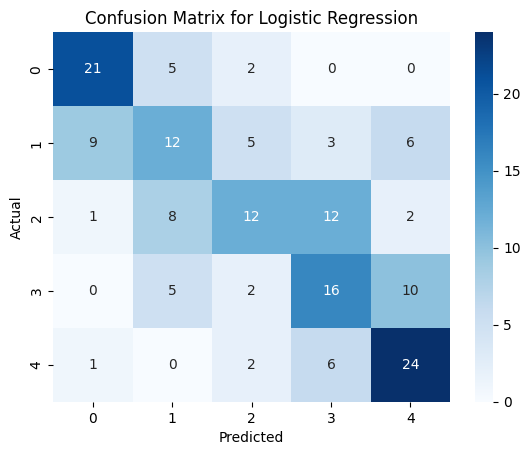

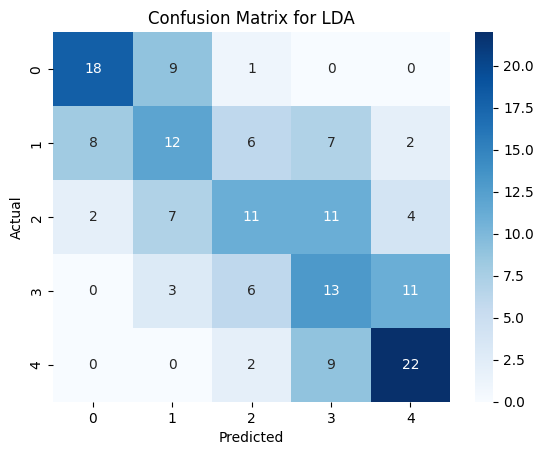

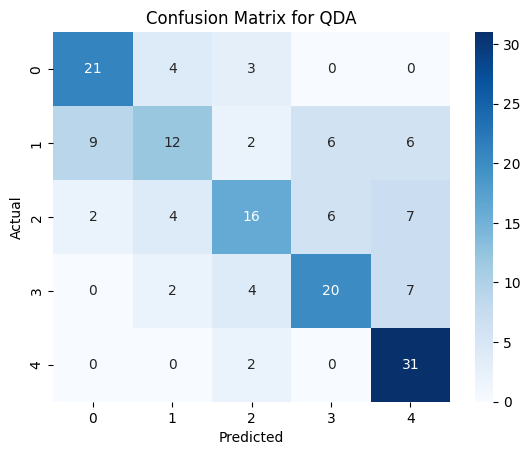

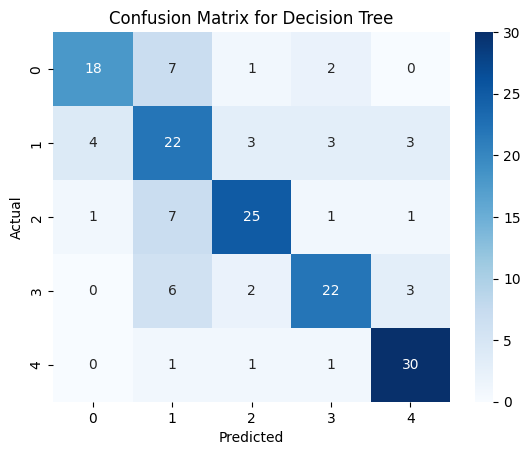

In [1044]:
for name, y_pred in predictions.items():
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

* Decision Tree is the best model, with 117 correct classifications.
* QDA performs better than Logistic Regression and LDA, with 100 correct classifications.
* Logistic Regression and LDA perform poorly, with 85 and 76 correct classifications, respectively.

## ROC Curve and AUC

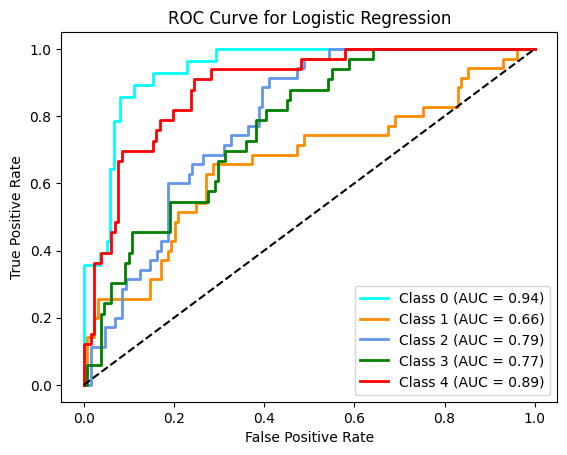

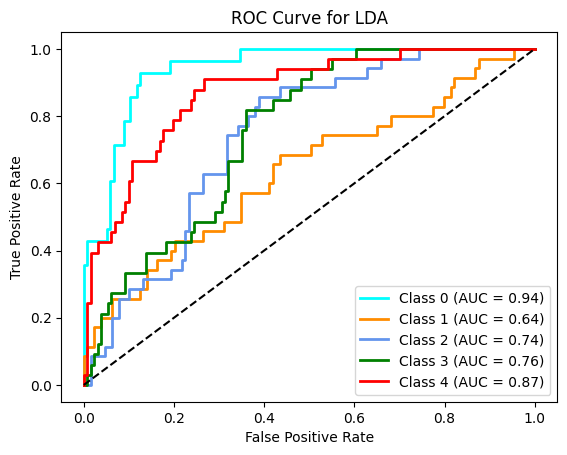

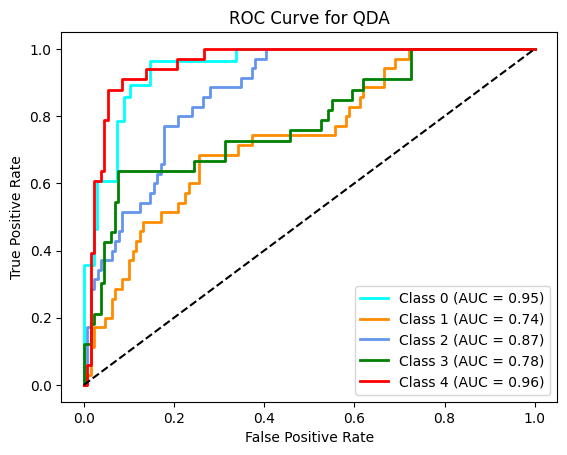

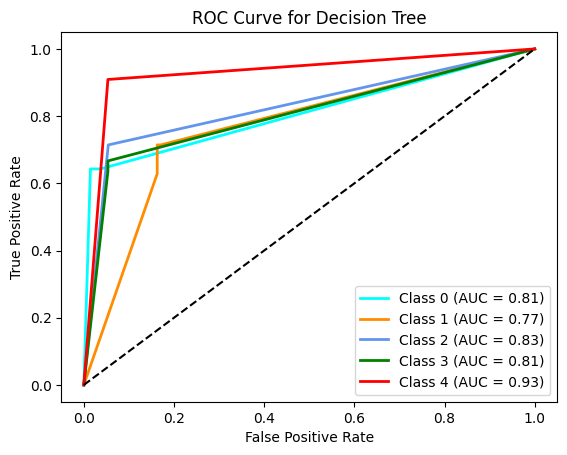

In [1045]:
from sklearn.preprocessing import label_binarize
from itertools import cycle

y_test_binarized = label_binarize(y_test, classes=[0, 1, 2, 3, 4])
n_classes = y_test_binarized.shape[1]
for name, model in models.items():
    y_score = model.predict_proba(X_test)
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green', 'red'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f'ROC Curve for {name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

### **Logistic Regression**

🔹 **Strengths**:
- Performs **exceptionally well for Class 0 (AUC = 0.94)**.
- Decent performance for **Classes 2, 3, and 4**.

🔹 **Weaknesses**:
- **Poor performance for Class 1 (AUC = 0.66)**.
- Struggles in distinguishing **Class 1 from other classes**, indicating a need for better feature selection or class balancing.

### **Decision Tree**

🔹 **Strengths**:
- **Better than Logistic Regression for Class 1** (AUC = 0.77 vs. 0.66).
- **More balanced performance** across all classes.
- Performs very well for **Class 4 (AUC = 0.93)**.

🔹 **Weaknesses**:
- **AUC scores are lower than QDA and Logistic Regression for Class 0**.
- **Overfitting risk** Decision Trees can memorize the training data rather than generalizing well.

### **QDA (Quadratic Discriminant Analysis)**

🔹 **Strengths**:
- **Highest AUC scores for Class 4 (0.96) and Class 0 (0.95)**.
- **Better than Logistic Regression and Decision Tree** in distinguishing multiple classes.

🔹 **Weaknesses**:
- Slightly better than Decision Tree for **Class 1 (AUC = 0.74)** but **still lower than ideal**.
- Can be sensitive to **small dataset size and feature correlation**.

### **LDA (Linear Discriminant Analysis)**

🔹 **Strengths**:
- **Decent performance for Class 0 (AUC = 0.94) and Class 4 (AUC = 0.87)**.
- Better generalization compared to Decision Tree.

🔹 **Weaknesses**:
- **Worst performance for Class 1 (AUC = 0.64)**, even worse than Logistic Regression.
- Performs **worse than QDA in all categories**.

# Conclusion
This study implemented a **Classification Analysis Framework** to build and compare multiple classification models for predicting heart disease. The analysis revealed that **Decision Tree Classifier** outperformed other models, achieving the highest **accuracy (71.34%)**, followed by **Quadratic Discriminant Analysis (QDA)** with **60.98% accuracy**. On the other hand, **Logistic Regression and Linear Discriminant Analysis (LDA)** exhibited lower performance, suggesting that nonlinear relationships in the dataset require more complex modeling approaches.

The study highlights the importance of **feature selection and data preprocessing**, as removing weakly correlated features improved model performance. Additionally, handling class imbalances using **SMOTE** helped achieve better classification results.

In conclusion, **Decision Tree proved to be the most effective model**, demonstrating strong predictive capabilities for heart disease classification. Future work can explore **ensemble learning techniques, deep learning models, and hyperparameter tuning** to further enhance predictive accuracy and robustness.